# Explore here

Banking marketing campaign solution

#### Exploratory Data Analysis EDA

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Obtain dimensions
data.shape

(41188, 21)

In [5]:
print(f"The DataFrame contains {len(data)} records (rows) and {len(data.columns)} variables (columns).\n")

The DataFrame contains 41188 records (rows) and 21 variables (columns).



In [6]:
# Obtain information about data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
print("There are not NaN records in the data set")

There are not NaN records in the data set


In [9]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
numerical_columns=['age',  'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
print(numerical_columns)
print(f"There are {len(numerical_columns)} numerical columns")

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
There are 10 numerical columns


In [11]:
categorical_columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
print(categorical_columns)
print(f"There are {len(categorical_columns)} numerical columns")

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
There are 11 numerical columns


In [12]:
data_c=data.copy()
data_c.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
job=data_c["job"].value_counts()
marital=data_c["marital"].value_counts()
education=data_c["education"].value_counts()
default=data_c["default"].value_counts()
housing=data_c["housing"].value_counts()
loan=data_c["loan"].value_counts()
contact=data_c["contact"].value_counts()
month=data_c["month"].value_counts()
day_of_week=data_c["day_of_week"].value_counts()
poutcome=data_c["poutcome"].value_counts()
y_=data_c["y"].value_counts()

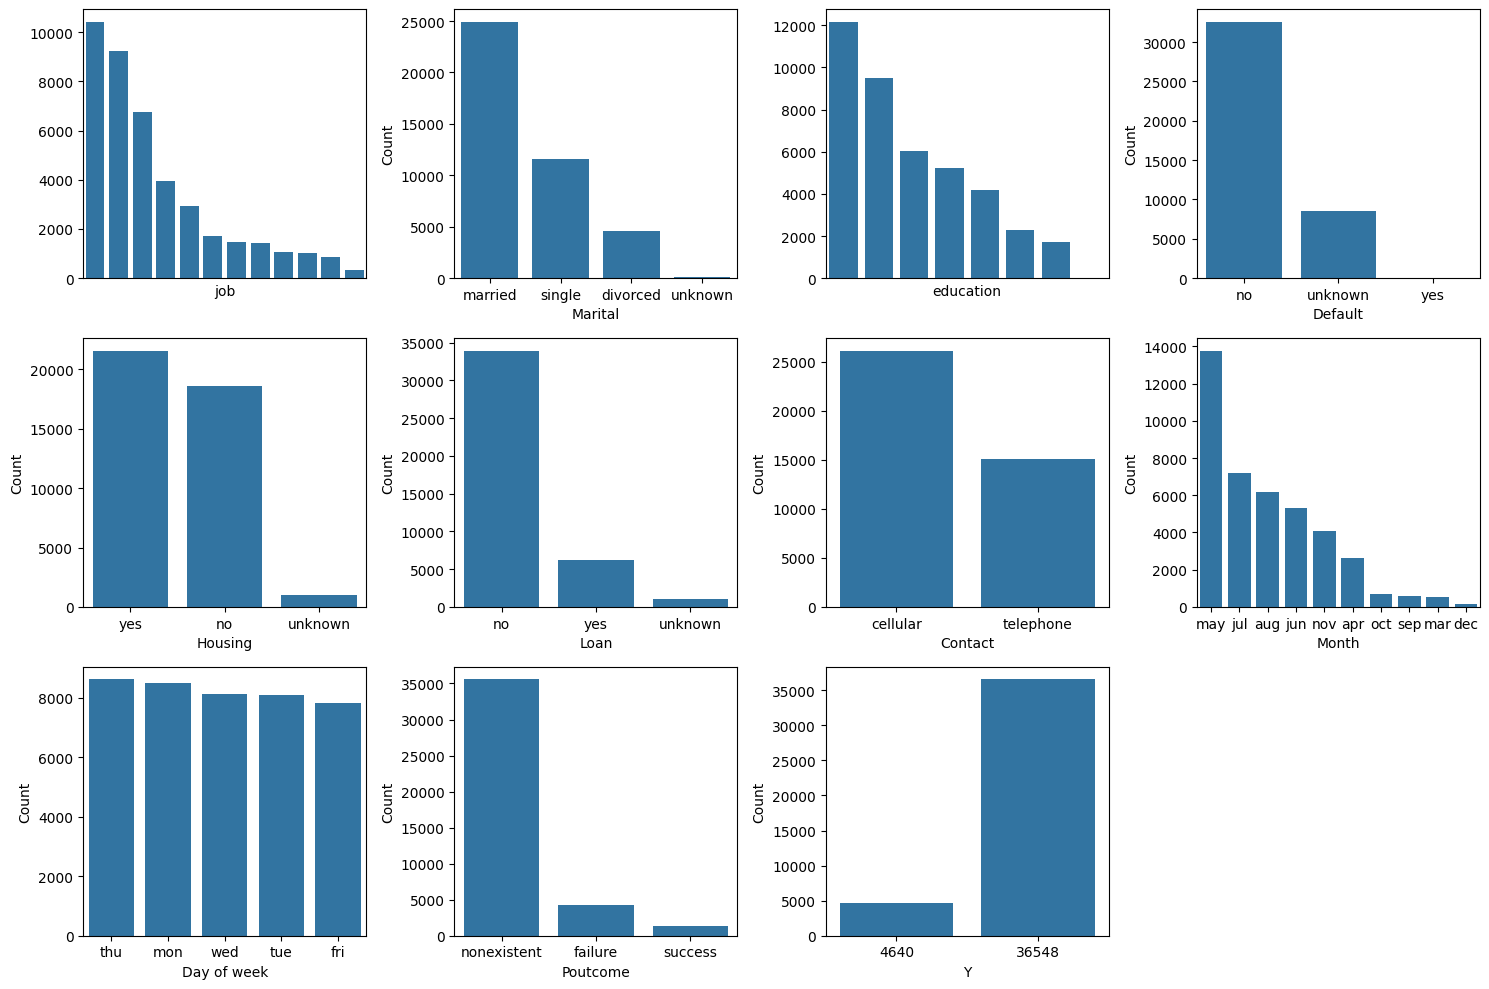

In [14]:
fig, axis = plt.subplots(3, 4, figsize = (15, 10))

fg1=sns.barplot(ax = axis[0, 0], x=job.index, y=job.values).set_xticks([])
#fg1.set(xlabel ="Job", ylabel = "Count", title =None)

fg2=sns.barplot(ax = axis[0, 1], x=marital.index, y=marital.values)
fg2.set(xlabel ="Marital", ylabel = "Count", title =None)

fg3=sns.barplot(ax = axis[0, 2], x=education.index, y=education.values).set_xticks([])
#fg3.set(xlabel ="Education", ylabel = "Count", title =None)

fg4=sns.barplot(ax = axis[0, 3], x=default.index, y=default.values)
fg4.set(xlabel ="Default", ylabel = "Count", title =None)

fg5=sns.barplot(ax = axis[1, 0], x=housing.index, y=housing.values)
fg5.set(xlabel ="Housing", ylabel = "Count", title =None)

fg6=sns.barplot(ax = axis[1, 1], x=loan.index, y=loan.values)
fg6.set(xlabel ="Loan", ylabel = "Count", title =None)

fg7=sns.barplot(ax = axis[1, 2], x=contact.index, y=contact.values)
fg7.set(xlabel ="Contact", ylabel = "Count", title =None)

fg8=sns.barplot(ax = axis[1, 3], x=month.index, y=month.values)
fg8.set(xlabel ="Month", ylabel = "Count", title =None)

fg9=sns.barplot(ax = axis[2, 0], x=day_of_week.index, y=day_of_week.values)
fg9.set(xlabel ="Day of week", ylabel = "Count", title =None)

fg10=sns.barplot(ax = axis[2, 1], x=poutcome.index, y=poutcome.values)
fg10.set(xlabel ="Poutcome", ylabel = "Count", title =None)

fg11=sns.barplot(ax = axis[2, 2], x=y_, y=y_.values)
fg11.set(xlabel ="Y", ylabel = "Count", title =None)

fig.delaxes(axis[2, 3])

# Adjust the layout
plt.tight_layout()
plt.show()

In [15]:
# Factorizing the categorical variables 
data_c["job_n"] = pd.factorize(data_c["job"])[0]
data_c["marital_n"] = pd.factorize(data_c["marital"])[0]
data_c["education_n"] = pd.factorize(data_c["education"])[0]
data_c["default_n"] = pd.factorize(data_c["default"])[0]
data_c["housing_n"] = pd.factorize(data_c["housing"])[0]
data_c["loan_n"] = pd.factorize(data_c["loan"])[0]
data_c["contact_n"] = pd.factorize(data_c["contact"])[0]
data_c["month_n"] = pd.factorize(data_c["month"])[0]
data_c["day_of_week_n"] = pd.factorize(data_c["day_of_week"])[0]
data_c["poutcome_n"] = pd.factorize(data_c["poutcome"])[0]
data_c["y_n"] = pd.factorize(data_c["y"])[0]

In [16]:
num_variables = ["y_n", "job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n", "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

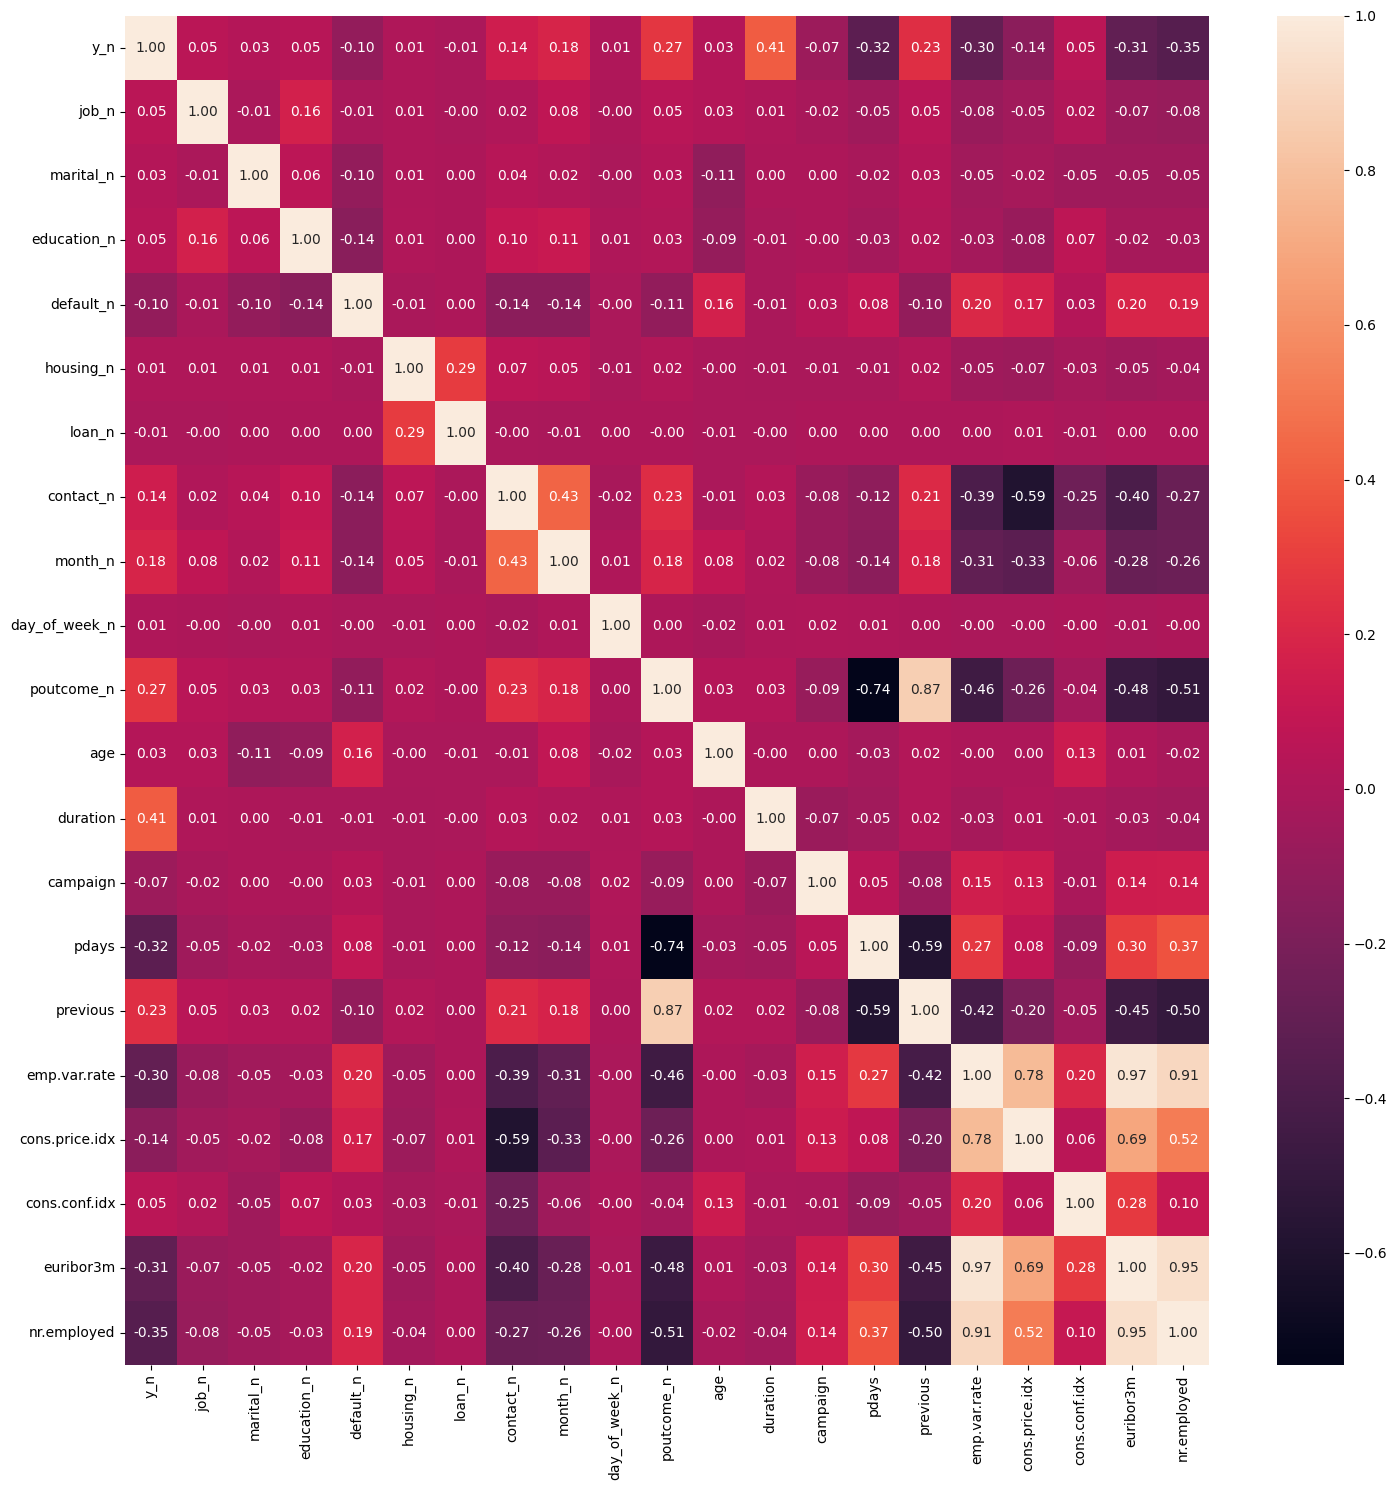

In [17]:
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(data_c[num_variables].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

In [18]:
# Min-Max scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data_c[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = data_c.index, columns = num_variables)
total_data_scal.head()

,y_n,job_n,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.481481,0.053070,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.0,0.090909,0.0,0.142857,0.5,0.0,0.0,0.0,0.0,0.0,...,0.493827,0.030297,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.0,0.090909,0.0,0.142857,0.0,0.5,0.0,0.0,0.0,0.0,...,0.246914,0.045954,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.0,0.181818,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,...,0.283951,0.030704,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.0,0.090909,0.0,0.142857,0.0,0.0,0.5,0.0,0.0,0.0,...,0.481481,0.062424,0.0,1.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735


In [19]:
# Feature selection

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("y_n", axis = 1)
y = total_data_scal["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

selection_model = SelectKBest(chi2, k = 5)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.0,0.0,0.000000,0.019497,0.203781
1,0.0,0.0,1.000000,0.981183,1.000000
2,0.0,0.0,0.333333,0.138291,0.512287
3,0.0,0.0,0.937500,0.956926,0.859735
4,0.0,0.0,0.937500,0.957379,0.859735


In [20]:
X_test_sel.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed
0,0.5,0.142857,0.333333,0.150759,0.512287
1,0.0,0.000000,0.937500,0.958059,0.859735
2,0.5,0.142857,0.333333,0.153933,0.512287
3,0.0,0.000000,1.000000,0.982317,1.000000
4,0.0,0.000000,1.000000,0.981410,1.000000


In [21]:
X_train_sel["y_n"] = list(y_train)
X_test_sel["y_n"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

#### Logistic Regression model

In [22]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,poutcome_n,previous,emp.var.rate,euribor3m,nr.employed,y_n
0,0.0,0.0,0.000000,0.019497,0.203781,1.0
1,0.0,0.0,1.000000,0.981183,1.000000,0.0
2,0.0,0.0,0.333333,0.138291,0.512287,0.0
3,0.0,0.0,0.937500,0.956926,0.859735,0.0
4,0.0,0.0,0.937500,0.957379,0.859735,0.0


In [23]:
X_train = train_data.drop(["y_n"], axis = 1)
y_train = train_data["y_n"]
X_test = test_data.drop(["y_n"], axis = 1)
y_test = test_data["y_n"]

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.], shape=(4119,))

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8953629521728574

#### Model optimization